# Demographic Data Analyzer

In this challenge you must analyze demographic data using Pandas. You are given a dataset of demographic data that was extracted from the 1994 Census database. Here is a sample of what the data looks like:

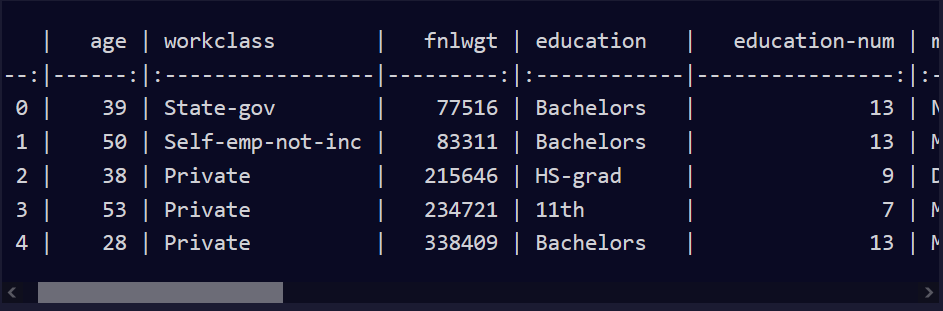

click [here](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/demographic-data-analyzer) to see full DataFrame

You must use Pandas to answer the following questions:

    1. How many people of each race are represented in this dataset?
    2. What is the average age of men?
    3. What is the percentage of people who have a Bachelor's degree?
    4. What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
    5. What percentage of people without advanced education make more than 50K?
    6. What is the minimum number of hours a person works per week?
    7. What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
    8. What country has the highest percentage of people that earn >50K and what is that percentage?
    9. Identify the most popular occupation for those who earn >50K in India.


### Dataset Source

Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php). Irvine, CA: University of California, School of Information and Computer Science.

In [2]:
import pandas as pd

In [3]:
demo = pd.read_csv('adult-data.csv')

In [4]:
demo.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
demo['salary']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: salary, Length: 32561, dtype: object

In [5]:
demo.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [15]:
demo.shape

(32561, 15)

#### *1. How many people of each race are represented in this dataset?* 

In [7]:
demo['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

#### *2. What is the average age of men?*

In [24]:
demoMenAge = demo[demo['sex'] == 'Male']
demoMenAge['age'].mean()

39.43354749885268

#### *3. What is the percentage of people who have a Bachelor's degree?*

In [15]:
total = demo.shape[0] #32561 total people in data set

bachelors = demo[demo['education'] == 'Bachelors'].shape[0] # num of people with a bachelors

(bachelors / total) * 100

16.44605509658794

#### *4. What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?*

In [30]:
# percentage out of total amount of people in entire dataset
advEduBach = demo['education'] == 'Bachelors'
advEduMast = demo['education'] == 'Masters'
advEduDoct = demo['education'] == 'Doctorate'
moreThan50K = demo['salary'] == '>50K'

eduSal = demo[(advEduBach | advEduMast | advEducDoct) & (moreThan50K)].shape[0] # num of people with advanced degrees & make more than 50K

(eduSal / total) * 100

10.706059396210192

In [17]:
# percentage out of only those w/ advanced degrees
eduTotal = demo[(advEduBach | advEduMast | advEducDoct)].shape[0] # num of people with advanced degree

(eduSal / eduTotal) * 100

46.535843011613935

#### *5. What percentage of people without advanced education make more than 50K?*

In [20]:
# percentage out of total amount of people in entire dataset
notEduSal = demo[(~(advEduBach | advEduMast | advEducDoct)) & (morethan50K)].shape[0] # num of people w/o advanced degrees & make more than 50K

(notEduSal / total) * 100

13.374896348392248

In [23]:
# percentage out of only those w/o advanced degrees
notEduTotal = demo[~(advEduBach | advEduMast | advEducDoct)].shape[0]

(notEduSal / notEduTotal) * 100

17.3713601914639

#### *6. What is the minimum number of hours a person works per week?*

In [28]:
minHours = demo['hours-per-week'].min()

minHours

1

#### *7. What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?*

In [31]:
# percentage out of total amount of people in entire dataset
minHoursSal = demo[(demo['hours-per-week'] == minHours) & (moreThan50K)].shape[0] # num of people who work 1 hour a week & make more than 50K

(minHoursSal / total) * 100

0.006142317496391388

In [34]:
# percentage out of only those w/ who work 1 hour a week

minHoursTotal = demo[(demo['hours-per-week'] == minHours)].shape[0] # num of people who work 1 hour a week

(minHoursSal / minHoursTotal) * 100

10.0

#### *8. What country has the highest percentage of people that earn >50K and what is that percentage?*

In [85]:
#total population in each country
countryPop = demo['native-country'].value_counts()

# shows pandas series of number of >50K earning individuals
richCountriesCount = demo['native-country'][demo['salary'] == '>50K'].value_counts()


# EXAMPLE: getting index name of largest number of people who makes >50K
# richCountriesCount[richCountriesCount == richCountriesCount.max()].index[0]


# shows pandas series of percentages of >50K earning individuals (based on country's population)
richCountriesPercentage = (richCountriesCount / countryPop) * 100 
richCountriesPercentage

?                             25.042882
Cambodia                      36.842105
Canada                        32.231405
China                         26.666667
Columbia                       3.389831
Cuba                          26.315789
Dominican-Republic             2.857143
Ecuador                       14.285714
El-Salvador                    8.490566
England                       33.333333
France                        41.379310
Germany                       32.116788
Greece                        27.586207
Guatemala                      4.687500
Haiti                          9.090909
Holand-Netherlands                  NaN
Honduras                       7.692308
Hong                          30.000000
Hungary                       23.076923
India                         40.000000
Iran                          41.860465
Ireland                       20.833333
Italy                         34.246575
Jamaica                       12.345679
Japan                         38.709677


In [86]:
maxPercentage = richCountriesPercentage.max()
maxPercentage

41.86046511627907

In [87]:
# country with the highest percentage of >50K earners
richCountriesCount[richCountriesPercentage == maxPercentage].index[0]

'Iran'

#### *9. Identify the most popular occupation for those who earn >50K in India.*

In [92]:
# shows panda series of number of occupations in India where it has a salary of >50K
indiaOccupations = demo['occupation'][(demo['salary'] == '>50K') & (demo['native-country'] == 'India')].value_counts()

indiaOccupations

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [93]:
# most popular occupation in India (>$50K salary)
indiaOccupations.index[0]

'Prof-specialty'